# Multi Model Training

In [29]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
                                StratifiedKFold,
                                cross_validate
                            )
from sklearn.metrics import (
                                confusion_matrix,
                                f1_score,
                                precision_score,
                                recall_score,
                                accuracy_score
                            )
warnings.filterwarnings('ignore')

### 1. Laod the Data

In [30]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

### 2. Define Multi Models

In [31]:
models = {
            'Logistic Regression' : LogisticRegression(),
            'Decision Tree': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier()
        }

### 3. Configure K-Fold CV

In [32]:
cv = StratifiedKFold(
                        n_splits=5,
                        random_state=42,
                        shuffle=True
                    )

### 4. Cross Validating Each model and getting best Model Instance (Estimator)

In [33]:
trained_models = {}

for model_name, model in models.items():
    print(f"\nCross Validation on {model_name}")

    cv_results = cross_validate(
                                model,
                                X_train,
                                Y_train,
                                cv=cv,
                                scoring='precision',
                                return_estimator=True, # This return actaul mode trained on best Folds
                                return_train_score=False,
                            )
    test_score = cv_results['test_score']
    best_index = np.argmax(test_score)

    estimator = cv_results['estimator'][best_index] # Trained Mdeol on that specific fold
    trained_models[model_name] = estimator 
    print(test_score)


Cross Validation on Logistic Regression
[0.71858134 0.73371336 0.69230769 0.73247381 0.71484682]

Cross Validation on Decision Tree
[0.81444867 0.81273983 0.82648402 0.82225657 0.81775701]

Cross Validation on Random Forest
[0.89797508 0.89617486 0.88632873 0.88792423 0.88479624]


### 5. Inference and Evaluation

In [44]:
Y_hat_tests = {}
for model_name, model in trained_models.items():
    print(f"\nEvaluations Metrics on {model_name}")
    Y_hat_test = model.predict(X_test)
    Y_hat_tests[model_name] = Y_hat_test
    accuaracy = accuracy_score(Y_test, Y_hat_test)
    precision = precision_score(Y_test, Y_hat_test)
    recall = recall_score(Y_test, Y_hat_test)
    f1_score_val = f1_score(Y_test, Y_hat_test)

    print(f"    Accuarcy: {accuaracy}")
    print(f"    Precision: {precision}")
    print(f"    Recall: {recall}")
    print(f"    f1 Score: {f1_score_val}")


Evaluations Metrics on Logistic Regression
    Accuarcy: 0.715
    Precision: 0.3719247467438495
    Recall: 0.6539440203562341
    f1 Score: 0.474169741697417

Evaluations Metrics on Decision Tree
    Accuarcy: 0.774
    Precision: 0.4394250513347023
    Recall: 0.544529262086514
    f1 Score: 0.4863636363636364

Evaluations Metrics on Random Forest
    Accuarcy: 0.83
    Precision: 0.5674300254452926
    Recall: 0.5674300254452926
    f1 Score: 0.5674300254452926


### 6. Confusion Matrices

In [40]:
cm1 = confusion_matrix(Y_test, Y_hat_tests['Logistic Regression'])
cm2 = confusion_matrix(Y_test, Y_hat_tests['Decision Tree'])
cm3 = confusion_matrix(Y_test, Y_hat_tests['Random Forest'])

Text(1583.6633986928105, 0.5, 'Actual')

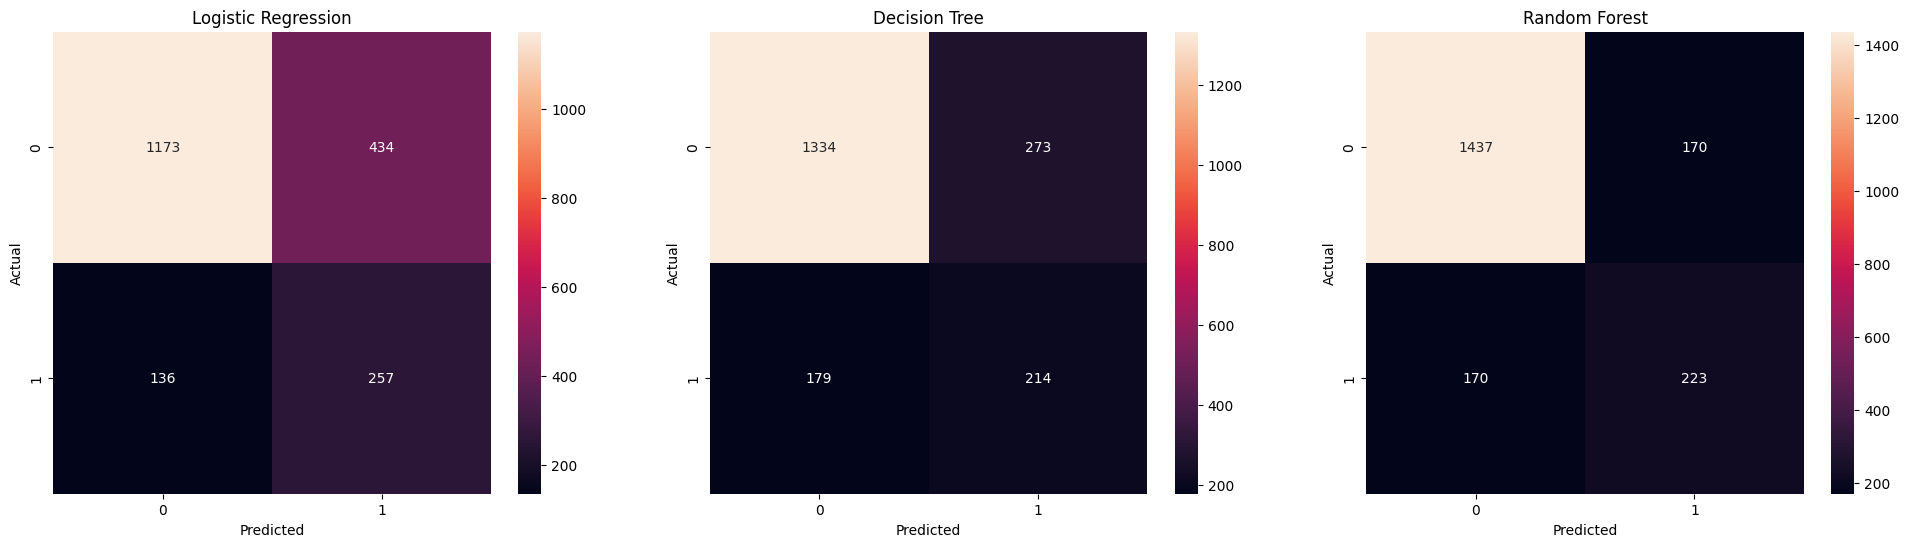

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize= (24, 6))

sns.heatmap(cm1, annot=True, fmt='d', ax=ax1)
ax1.set_title('Logistic Regression')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', ax=ax2)
ax2.set_title('Decision Tree')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')


sns.heatmap(cm3, annot=True, fmt='d', ax=ax3)
ax3.set_title('Random Forest')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')